In [163]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from numpy import math 
from math import exp
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [164]:
diabetes=load_diabetes()

In [165]:
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [166]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [167]:
features=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
target=pd.DataFrame(diabetes.target,columns=['TARGET'])

In [168]:
data=pd.concat([features,target],axis=1)

In [169]:
data2=data.corr('pearson')
data2
abs(data2['TARGET']).sort_values(ascending=False)

TARGET    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
s4        0.430453
s3        0.394789
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
Name: TARGET, dtype: float64

In [170]:
sep1=0.2*len(data)
sep2=0.9*len(data)

sep1=int(sep1)
sep2=int(sep2)

x_train=np.array(data['bmi'][sep1:sep2])
y_train=np.array(data['TARGET'][sep1:sep2])

x_test=np.array(data['bmi'][sep2:])
y_test=np.array(data['TARGET'][sep2:])

#normalize the dataset
x_train = x_train/x_train.mean()
y_train = y_train/y_train.mean()

x_test = x_test/x_test.mean()
y_test = y_test/y_test.mean()

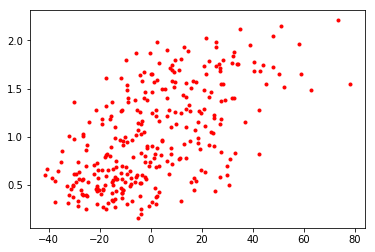

In [171]:
fig=plt.figure()

plt.plot(x_train,y_train,'r.')
plt.show()

In [172]:
def hypothesis(a,x,b):
    return a*x+b

In [173]:
def error(a,x,b,y):
    e=0
    m=len(y)
    for i in range(m):
        e+=np.power((hypothesis(a,x[i],b)-y[i]),2)
    return (1/(2*m)*e)

In [174]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a=0
    grad_b=0
    m=len(y)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,x[i],b)-y[i])*x[i]
        grad_b += 2/m * (hypothesis(a,x[i],b)-y[i])
      
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    
    return a,b

In [175]:
def descend(initial_a,initial_b,x,y,learning_rate,iterations):
    a=initial_a
    b=initial_b
   
    for i in range(iterations):
        e=error(a,x,b,y)
        a,b=step_gradient(a,x,b,y,learning_rate)
        if i % 1000 == 0:
            print(f"Error: {e},a:{a},b:{b}")
    return a,b

In [176]:
init_a=0
init_b=1




iters=10000
learning_rate=0.00001

In [177]:
final_a,final_b=descend(init_a,init_b,x_train,y_train,learning_rate,iters)

Error: 0.12626201860988995,a:0.00013222031834384752,b:1.0
Error: 0.08164057443517847,a:0.013497872689927075,b:0.9997595155597178
Error: 0.08163712782255246,a:0.01349911919520608,b:0.9994969811119317
Error: 0.08163381620462204,a:0.013499645749667713,b:0.9992396332931344
Error: 0.08163063417795746,a:0.013500161861764205,b:0.9989873710307091
Error: 0.08162757667135294,a:0.013500667774754631,b:0.9987400938269532
Error: 0.08162463881205045,a:0.013501163690189668,b:0.9984977031700669
Error: 0.08162181591797457,a:0.013501649805635148,b:0.9982601024949799
Error: 0.08161910349027024,a:0.013502126314752701,b:0.9980271971448837
Error: 0.08161649720613279,a:0.01350259340737693,b:0.9977988943335252


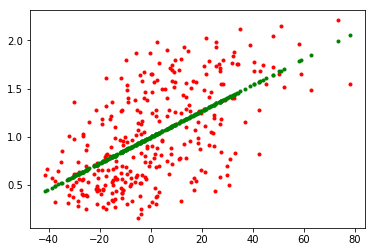

In [178]:
plt.plot(x_train,y_train,'r.',x_train,hypothesis(final_a,x_train,final_b),'g.')

In [179]:
a=0.01350259340737693
b=0.9977988943335252
error(a,x_train,b,y_train)

0.08161649465157306

In [180]:
error(a,x_test,b,y_test)

0.08206782185911883